In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Technically not necessary in newest versions of jupyter
%matplotlib inline

## Loading data 

In [2]:
import os 
data_path = "C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\"

os.listdir(data_path)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

## Exploring data

In [3]:
# The PIL library is used to open image content into an array
from PIL import Image

In [4]:
data = []
labels = []
classes = 43

cur_path = os.getcwd()

for i in range(43):
    path = os.path.join(data_path, "train", str(i))
    images = os.listdir(path)
    
    
    for a in images:
        try:
            image = Image.open(path+"\\" + a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error lpading image")
            

    

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape)

(39209, 30, 30, 3)


In [7]:
print(labels.shape)

(39209,)


In [8]:
# split the data to train ,test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape , y_test.shape)

(26270, 30, 30, 3) (26270,)
(12939, 30, 30, 3) (12939,)


**Convert the label using one-hot-encoding**

In [10]:
from tensorflow.keras.utils import to_categorical

# converting
y_train = to_categorical(y = y_train, num_classes= 43)
y_test = to_categorical(y= y_test , num_classes= 43)

In [11]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
print(y_train.shape)
print(y_test.shape)

(26270, 43)
(12939, 43)


## start build the classifier

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D , Flatten


model = Sequential()
# first layer
model.add(Conv2D(filters= 32, kernel_size=(5,5) , activation= "relu" , input_shape = X_train.shape[1:]))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate = 0.25))

# layer 2
model.add(Conv2D(filters= 64, kernel_size=(3,3) , activation= "relu"))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

# dense layers
model.add(Dense(256, "relu"))
model.add(Dropout(rate= 0.5))

# output layer
model.add(Dense(43 , activation= "softmax"))

# compile the model
model.compile(optimizer = "adam", 
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

In [15]:
# create early stop 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= "val_loss" , patience= 2)

## train the model 

In [16]:
model.fit(X_train , y_train , 
         batch_size = 64,
         epochs = 15,
         validation_data = (X_test, y_test),
         callbacks = [early_stop])


Train on 26270 samples, validate on 12939 samples
Epoch 1/15
26270/26270 [==============================] - 31s 1ms/sample - loss: 4.1592 - accuracy: 0.2373 - val_loss: 1.6813 - val_accuracy: 0.5847
Epoch 2/15
26270/26270 [==============================] - 30s 1ms/sample - loss: 1.6343 - accuracy: 0.5217 - val_loss: 0.8132 - val_accuracy: 0.7787
Epoch 3/15
26270/26270 [==============================] - 29s 1ms/sample - loss: 1.1475 - accuracy: 0.6518 - val_loss: 0.5301 - val_accuracy: 0.8623
Epoch 4/15
26270/26270 [==============================] - 30s 1ms/sample - loss: 0.8891 - accuracy: 0.7254 - val_loss: 0.3696 - val_accuracy: 0.9026
Epoch 5/15
26270/26270 [==============================] - 30s 1ms/sample - loss: 0.7408 - accuracy: 0.7722 - val_loss: 0.3183 - val_accuracy: 0.9202
Epoch 6/15
26270/26270 [==============================] - 29s 1ms/sample - loss: 0.6588 - accuracy: 0.7949 - val_loss: 0.2515 - val_accuracy: 0.9367
Epoch 7/15
26270/26270 [==============================] 

In [17]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,4.159198,0.237305,1.681254,0.584744
1,1.634346,0.521698,0.813230,0.778731
2,1.147485,0.651846,0.530084,0.862277
3,0.889090,0.725390,0.369570,0.902620
4,0.740845,0.772212,0.318300,0.920241
5,0.658825,0.794861,0.251493,0.936703
6,0.590876,0.817777,0.207517,0.943813
7,0.556744,0.830187,0.233012,0.934771
8,0.511607,0.841150,0.182594,0.945127
9,0.465534,0.855082,0.161926,0.955097


<Figure size 720x360 with 0 Axes>

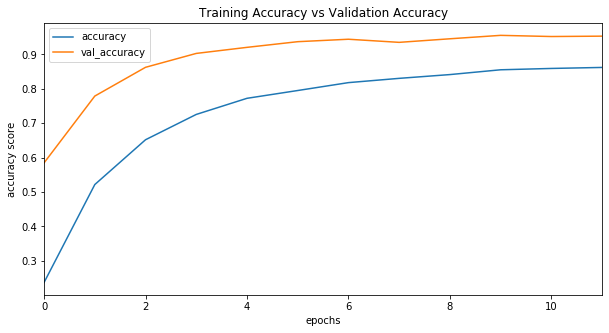

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize = (10,5))
losses[["accuracy","val_accuracy"]].plot(figsize = (10,5) , title = "Training Accuracy vs Validation Accuracy" ,
                                         legend = "best" )

plt.xlabel("epochs")
plt.ylabel("accuracy score")

plt.show()

plt.savefig("Training Accuracy.jpg")
plt.show()

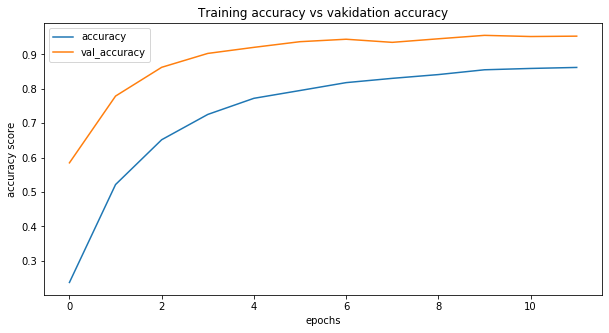

In [78]:
plt.figure(figsize = (10,5))
plt.plot(losses[["accuracy"]] , label = "accuracy")
plt.plot(losses[["val_accuracy"]] , label = "val_accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy score")
plt.title("Training accuracy vs vakidation accuracy")
plt.legend(loc = "best")

# save the figure as an image 
# plt.savefig("training accuracy.png")
# plt.close()                       # you have to close the plt show moode or something near to this check the link below 

# ( https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib )

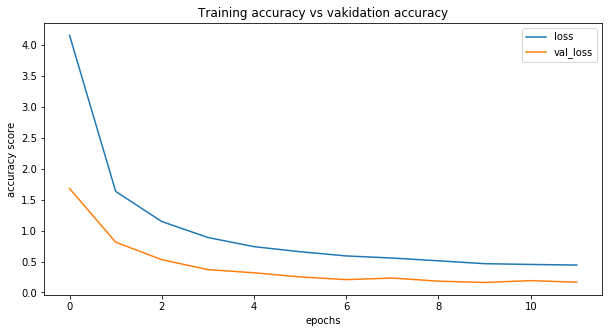

In [80]:
plt.figure(figsize = (10,5))
plt.plot(losses[["loss"]] , label = "loss")
plt.plot(losses[["val_loss"]] , label = "val_loss")

plt.xlabel("epochs")
plt.ylabel("accuracy score")
plt.title("Training accuracy vs vakidation accuracy")
plt.legend(loc = "best")

# plt.savefig("training losses.png")
# plt.close()

In [21]:
import pandas as pd
test = pd.read_csv("C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\Test.csv")
labels = test["ClassId"].values
images = test["Path"].values




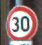

In [22]:
Image.open("C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\Test\\00001.png")

In [23]:
data = []

for img in images:
    image = Image.open(data_path+ str(img))
    image = image.resize((30,30))
    data.append(np.array(image))
    

In [24]:
# convert to array
X_test = np.array(data)

In [26]:
X_test = X_test.astype("float32")

In [27]:
pred = model.predict_classes(X_test)

## Evaluating the model 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print("The Accuracy Score of our Classifier is [{}]".format(accuracy_score(labels , pred)))

The Accuracy Score of our Classifier is [0.9056215360253365]


In [42]:
# classification report
matrix = confusion_matrix(labels , pred)
matrix

array([[ 49,   4,   0, ...,   0,   0,   0],
       [ 12, 655,  13, ...,   1,   0,   0],
       [  0,   8, 656, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  40,   0],
       [  0,   0,   0, ...,   0,  16,  71]], dtype=int64)

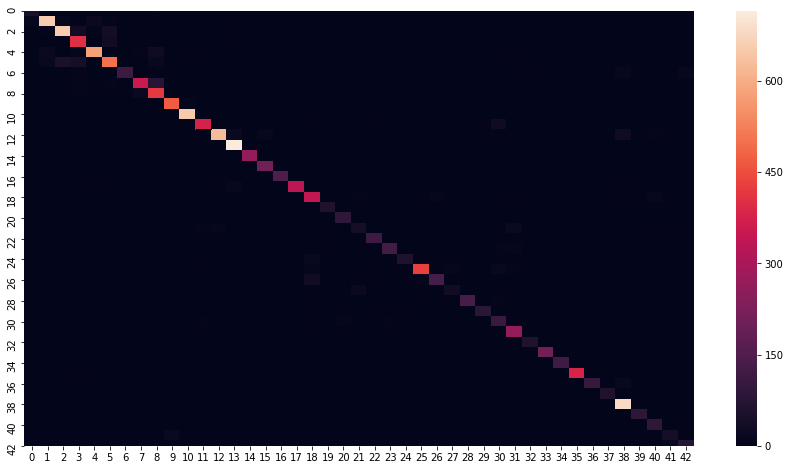

In [41]:
plt.figure(figsize = (15, 8))
sns.heatmap(matrix)

In [47]:
print(classification_report(labels , pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        60
           1       0.93      0.91      0.92       720
           2       0.91      0.87      0.89       750
           3       0.78      0.90      0.84       450
           4       0.94      0.88      0.91       660
           5       0.85      0.79      0.82       630
           6       0.99      0.77      0.87       150
           7       0.90      0.79      0.84       450
           8       0.76      0.93      0.83       450
           9       0.95      0.98      0.97       480
          10       0.97      0.99      0.98       660
          11       0.95      0.90      0.92       420
          12       0.97      0.90      0.94       690
          13       0.94      0.99      0.97       720
          14       1.00      0.99      0.99       270
          15       0.90      1.00      0.95       210
          16       0.99      0.99      0.99       150
          17       0.99    

In [49]:
# transform yosur classification report into a file

report = classification_report(labels , pred, output_dict= True)
report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.803279,0.816667,0.809917,60.000000
1,0.929078,0.909722,0.919298,720.000000
2,0.907331,0.874667,0.890699,750.000000
3,0.781431,0.897778,0.835574,450.000000
4,0.943089,0.878788,0.909804,660.000000
5,0.850340,0.793651,0.821018,630.000000
6,0.991453,0.773333,0.868914,150.000000
7,0.896725,0.791111,0.840614,450.000000
8,0.755396,0.933333,0.834990,450.000000
9,0.951417,0.979167,0.965092,480.000000


In [53]:
report_df.to_csv("model_1 report.csv")

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

## save model summary 

In [87]:
from contextlib import redirect_stdout

with open('modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

## Save model

In [89]:
model.save("traffic_classifier_.h5")